In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

In [2]:
# Loading the dataset and printing forst 5 rows
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
# Checking the size of dataset
df.shape

(374, 13)

In [4]:
# Checking the summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
# Checking null values in the dataset
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

From the above summary, it is evident that only 1 column i,e. "Sleep Disorder" has 219 null values in the dataframe and this column is necessary as it is the outcome of several factors(mentioned in rest of the columns) which leads to sleep disorder.

In [6]:
# Dropping all null values in column "Sleep Disorder" as without this value, it is not possible to derive any insights that how age or sleep duration is affecting the sleep disorder.
df=df.dropna(subset=["Sleep Disorder"])

In [7]:
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [12]:
# converting categorical columns:('BMI Category','Occupation','Sleep Disorder') to numerical columns

# df['BMI Category'].unique() #array(['Obese', 'Normal Weight', 'Normal', 'Overweight'], dtype=object)
# df['BMI Category']=le.fit_transform(df['BMI Category'])
# # df['BMI Category']

# df['Occupation'].unique()  #array(['Sales Representative','Software Engineer','Teacher','Nurse','Doctor','Scientist','Lawyer','Accountant', 'Engineer','Salesperson'], dtype=object)
# df['Occupation']=le.fit_transform(df['Occupation'])
# # df['Occupation']

# df['Sleep Disorder'].unique() #array(['Sleep Apnea', 'Insomnia'], dtype=object)
# df['Sleep Disorder']=le.fit_transform(df['Sleep Disorder'])
# # df['Sleep Disorder']

In [8]:
# Checking outliers in all features
categorical_cols= ['BMI Category','Occupation','Sleep Disorder']
numeric_cols = ['Age', 'Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level', 'Heart Rate', 'Daily Steps']
All_cols_except_BP = ['Age', 'Occupation', 'Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']

for col in numeric_cols:
    fig=px.box(df, x='Gender', y=col, color='Gender')
    fig.show()

In [14]:
# Standardising the dataframe 
# scaler=StandardScaler()
# df[All_numeric_cols]=scaler.fit_transform(df[All_numeric_cols])

# for col in All_numeric_cols:
#     fig=px.box(df, x='Gender', y=col, color='Gender')
#     fig.show()

In [19]:
# Relation between Gender and 'Sleep Disorder'
Genderbaseddisorder_df = df.groupby('Gender')['Sleep Disorder'].value_counts().reset_index(name='count')
Genderbaseddisorder_df

,Gender,Sleep Disorder,count
0,Female,None,82
1,Female,Sleep Apnea,67
2,Female,Insomnia,36
3,Male,None,137
4,Male,Insomnia,41
5,Male,Sleep Apnea,11


In [20]:
fig = px.bar(Genderbaseddisorder_df,x='Gender',y='count', color='Sleep Disorder')
fig.show()

As compared to male counterparts, Females have more sleep disorder. And, "Insomnia" is less found in Female but more in Male and "Sleep Apnea" is more in Female compared to Males

In [21]:
corr_df=df[numeric_cols].corr()
px.imshow(corr_df, color_continuous_scale='Blues')

* Sleep quality strongly correlates with sleep duration, physical activity, and lower stress levels, making it the single most connected health metric.
* Physical activity level and daily steps move together very strongly, showing that active people have more steps throughout their day.
* Higher stress levels correlate with elevated heart rate and show moderate connections to physical activity patterns.
* Age has relatively weak correlations with most health behaviors, suggesting lifestyle choices matter more than age alone.

In [22]:
# Relation between several factors such as 'Quality of Sleep','Sleep Duration', 'Stress Level' and 'Sleep Disorder'

factors_df=df.groupby('Sleep Disorder')[['Quality of Sleep','Sleep Duration', 'Stress Level']].mean().reset_index()
factors_df

,Sleep Disorder,Quality of Sleep,Sleep Duration,Stress Level
0,Insomnia,6.532468,6.589610,5.870130
1,None,7.625571,7.358447,5.114155
2,Sleep Apnea,7.205128,7.032051,5.666667


Text(0, 0.5, 'Average')

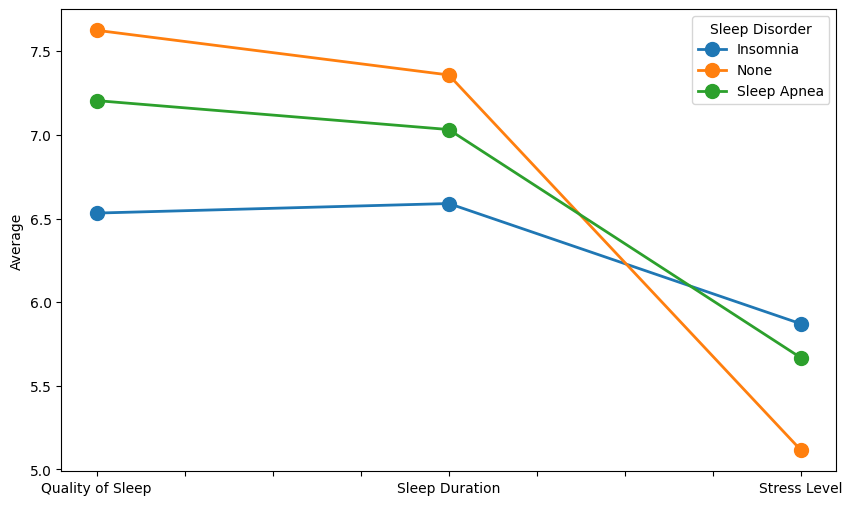

In [23]:
factors_df.set_index('Sleep Disorder')[['Quality of Sleep','Sleep Duration', 'Stress Level']].T.plot(marker='o', figsize=(10,6), linewidth=2, markersize=10)
plt.ylabel('Average')

*From the above plot, its clear that "Insomnia" disorder has low sleep quality, low sleep duration and low stress level as compared to "Sleep Apnea" disorder.*

In [24]:
# Occupation Analysis

Occupation_age_df=df.groupby('Occupation')['Person ID'].count().sort_values(ascending=False).reset_index(name='Ppl_count')
Occupation_age_df

,Occupation,Ppl_count
0,Nurse,73
1,Doctor,71
2,Engineer,63
3,Lawyer,47
4,Teacher,40
5,Accountant,37
6,Salesperson,32
7,Scientist,4
8,Software Engineer,4
9,Sales Representative,2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Nurse'),
  Text(1, 0, 'Doctor'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Lawyer'),
  Text(4, 0, 'Teacher'),
  Text(5, 0, 'Accountant'),
  Text(6, 0, 'Salesperson'),
  Text(7, 0, 'Scientist'),
  Text(8, 0, 'Software Engineer'),
  Text(9, 0, 'Sales Representative'),
  Text(10, 0, 'Manager')])

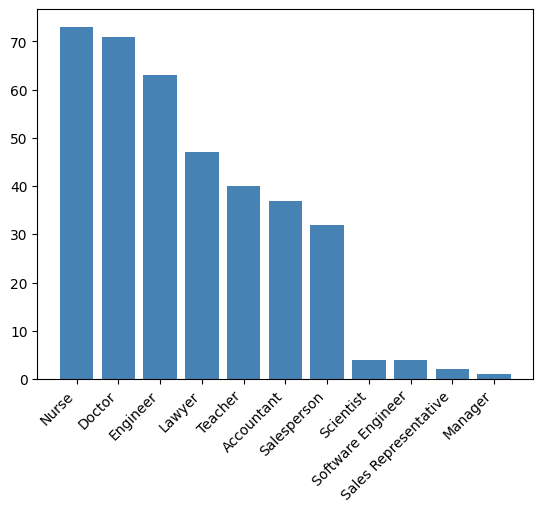

In [25]:
plt.bar(Occupation_age_df['Occupation'], Occupation_age_df['Ppl_count'], color='steelblue')
plt.xticks(rotation=45, ha='right')

*We see that the database has more number of people having occupation as Nurse, Teacher and Salesperson as compared to any other profession. So, it is highly likely that most of teh sleeping disorders are here. We can analyze teh sleeping disorder in each profession as well.*

In [26]:
print('Sleep Disorder in Nurse:', df[df['Occupation'] == 'Nurse'].groupby('Sleep Disorder').size())

print('Sleep Disorder in Teacher:', df[df['Occupation'] == 'Teacher'].groupby('Sleep Disorder').size())

print('Sleep Disorder in Salesperson:', df[df['Occupation'] == 'Salesperson'].groupby('Sleep Disorder').size())

Sleep Disorder in Nurse: Sleep Disorder
Insomnia        3
None            9
Sleep Apnea    61
dtype: int64
Sleep Disorder in Teacher: Sleep Disorder
Insomnia       27
None            9
Sleep Apnea     4
dtype: int64
Sleep Disorder in Salesperson: Sleep Disorder
Insomnia       29
None            2
Sleep Apnea     1
dtype: int64



From further analysis of Highest occupation of people, ther is a possibility taht occupation is a major cause of sleep disorder in people which can be said because:

1.Nurse have maximum "Sleep Apnea" cases which might be due to on-off duty timings of Nurse.

2.Teachers have maximum 'Insomnia' cases which might be due to stress in their occupation.

3.Salesperson has also maximum 'Insomia' cases which might be due to stress & performance pressure in their occupation.

**From the above analysis, we can say that :**

1. Females have more sleeping disorders as compared to Men, so ther's a need to come up with some preventive measures and create awareness campaigns for curing this sleep disorder in women.
2. Ocuupations such as Nurse, teacher and Salesperson are more prone to sleeping disorder, so by dpoing some research in these particular campaigns and taking feedback from the people in these occupations can give some insght why thsi profession has more sleeping disorder as compared to other professions.
3. By reducing teh stress level and increasing sleep duration and quality of sleep, people can prevent themseleves from any sleep disorder in future as tehse 3 factors are highly co-related.